# Task 6 - Задание на кластеризацию

По данной ссылке доступны датасеты для выполнения задания.

📂 https://disk.yandex.ru/d/6BtJviqr61w0YA

Можно выполнять на любом или на двух сразу.

##Описания датасетов

**Mall customer** - покупатели универмага

	•	CustomerID – Уникальный идентификатор, присвоенный клиенту
	•	Gender – Пол клиента
	•	Age – Возраст клиента
	•	Annual Income (k$) – Годовой доход клиента (в тысячах долларов)
	•	Spending Score (1-100) – Оценка, присвоенная торговым центром на основе поведения клиента и его привычек тратить деньги

**Credit Card Customer** клиенты банка (продукт кредитных карт)

	•	Customer Serial Identification Number – Серийный идентификационный номер клиента: используется для индексации значений
	•	Customer Key – Ключ клиента
	•	Avg_Credit_Limit – Средний кредитный лимит клиента
	•	Total_Credit_Cards – Общее количество кредитных карт, принадлежащих клиенту
	•	Total_visits_bank – Общее количество посещений банка клиентом
	•	Total_visits_online – Общее количество онлайн-визитов клиента в банк
	•	Total_calls_made – Общее количество звонков клиента в банк

🏁 **Задание: выполнить сегментацию клиентов (с помощью любых двух алгоритмов кластеризации)**. Дайте названия вашим кластерам (метки)

Оценка:

- $3$ балла - выполнена только кластеризация на датасете Mall customer
- $5$ баллов - выполнена только кластеризация на датасете Credit Card Customer
- $10$ баллов - выполнена кластеризация на обоих датасетах

- $+2$ балла за каждый дополнительный метод кластеризации
- $-2$ балла если при работе с датасетом использовался только один метод

In [284]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [285]:
# ваш код здесь
credit_card = pd.read_csv('Credit_Card_Customer_Data.csv')
mall_customer = pd.read_csv('Mall_Customers.csv')


In [286]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [287]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [288]:
mall_customer1 = mall_customer[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [289]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
mall_customer_scaled = scaler.fit_transform(mall_customer1)
 
# заново создадим датафрейм с нормализованными значениями
df_scaled = pd.DataFrame(mall_customer_scaled, columns = mall_customer1.columns)
 
# посмотрим на первые пять строк
df_scaled.round(2).head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.42,-1.74,-0.43
1,-1.28,-1.74,1.20
2,-1.35,-1.70,-1.72
3,-1.14,-1.70,1.04
4,-0.56,-1.66,-0.40


In [290]:
X = df_scaled

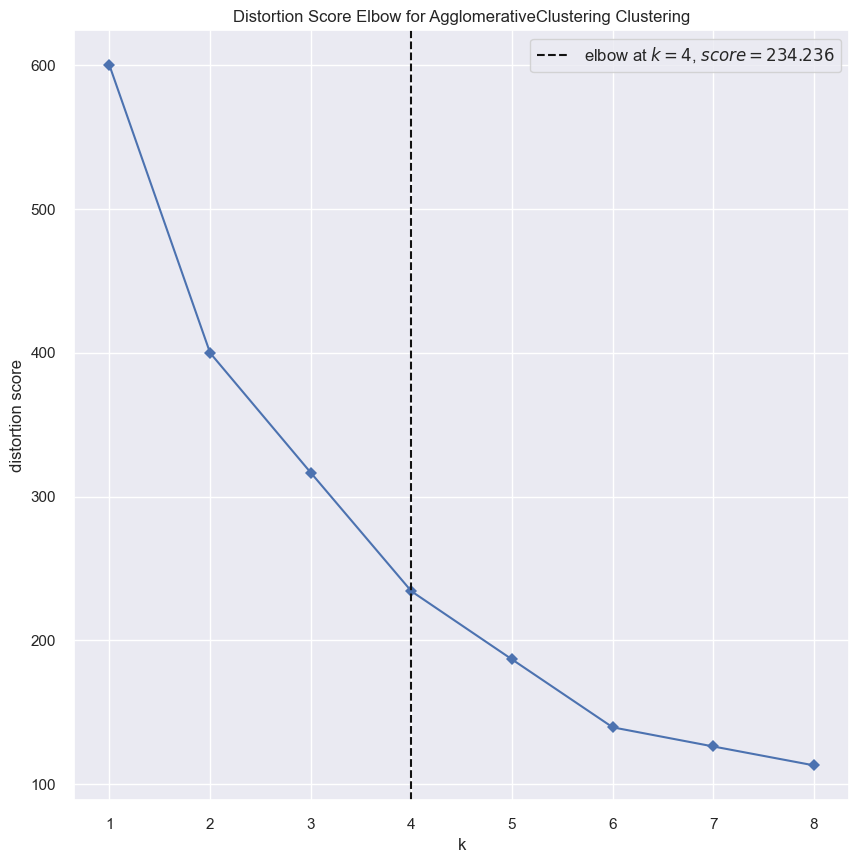

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [291]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,9), timings=False)

visualizer.fit(X)
visualizer.show()

In [292]:
model = KMeans(n_clusters=5, init='k-means++', n_init='auto', random_state=1, verbose=1)

In [293]:
model.fit(X)

Initialization complete
Iteration 0, inertia 254.19149404563933.
Iteration 1, inertia 169.56773247641058.
Iteration 2, inertia 168.88062427485028.
Iteration 3, inertia 168.55410298790025.
Iteration 4, inertia 168.32221251238957.
Iteration 5, inertia 168.24758017556837.
Converged at iteration 5: strict convergence.


KMeans(n_clusters=5, random_state=1, verbose=1)

In [294]:
labels = model.predict(X)
labels

array([1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 4, 1, 1, 1, 0, 0, 0, 0, 1, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [295]:
model.cluster_centers_

array([[ 1.20484056, -0.23577338, -0.05236781],
       [-0.98067852, -0.74305983,  0.46744035],
       [ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.07333084,  0.97494509, -1.19729675]])

In [296]:
lables = model.predict(X)
X['claster'] = lables
colors=['red', 'green', 'orange']

In [302]:
X

,Age,Annual Income (k$),Spending Score (1-100),claster
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,2
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,3
196,0.441365,2.497807,-0.861839,4
197,-0.491602,2.497807,0.923953,3
198,-0.491602,2.917671,-1.250054,4


# Алгоритм DBSCAN

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

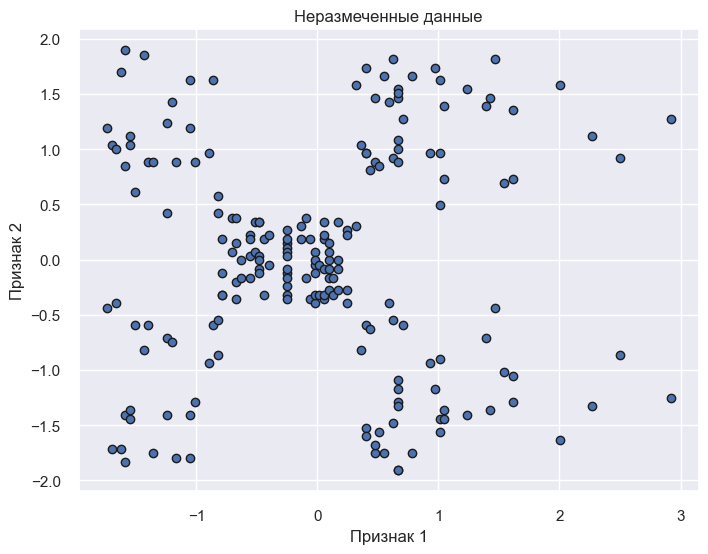

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[['Annual Income (k$)']], X[['Spending Score (1-100)']], edgecolors='k')
plt.title("Неразмеченные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward') # single , complete, average
labels = model.fit_predict(X)
print(labels)

[0 0 4 0 0 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 2 0 4 0 4 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 2 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 2 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 1 0 0 0 2 2 2 2 0 1 3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


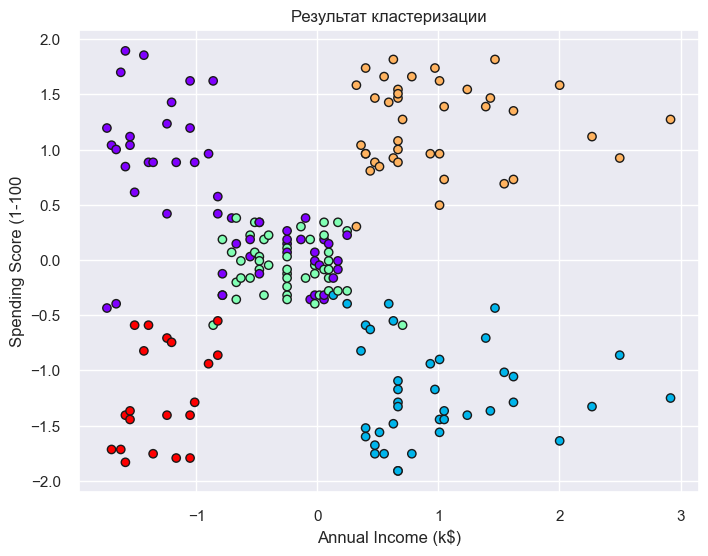

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[['Annual Income (k$)']], X[['Spending Score (1-100)']], c=labels, cmap='rainbow', edgecolors='k')
plt.title("Результат кластеризации")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()